# Problem Statement

In this competition, goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


In [2]:
# Importng Required Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist

Using TensorFlow backend.


## Data Prepration

### Load Data

### Using External Data From Kaggle Datasets 

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.vstack((X_train, X_test))
y_train = np.concatenate([y_train, y_test])

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
train = pd.read_csv(r'/kaggle/input/digit-recognizer/train.csv').values
test = pd.read_csv(r'/kaggle/input/digit-recognizer/test.csv').values.astype('float32')

In [5]:
y_val = train[:,0].astype('int32')
X_val = train[:,1:].astype('float32')

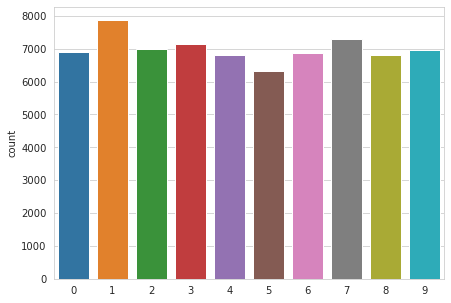

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(7,5))
sns.countplot(y_train)

### Normalization

In [7]:
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
test = test.astype('float32')/255 

### Reshape

In [8]:
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)
test=test.reshape(-1,28,28,1)

In [9]:
print(X_train.shape, y_train.shape)

(70000, 28, 28, 1) (70000,)


In [10]:
print(X_val.shape, y_val.shape)

(42000, 28, 28, 1) (42000,)


### Label Encoding

In [11]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

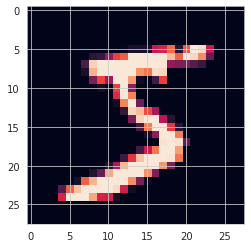

In [12]:
plt.imshow(X_train[0][:,:,0])

## CNN

### Defining the model

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# define the model
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=192, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=192, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
# summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 192)       221376    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 192)        

### Initializing Optimizer

In [14]:
optimizer='adam'

In [15]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])

In [16]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.3, verbose=1,
                              patience=2, min_lr=0.00000001)

In [17]:
history = model.fit(X_train,y_train, batch_size=100,
                              epochs = 25, validation_data = (X_val,y_val),
                              verbose = 1, callbacks=[reduce_lr], shuffle = True)

Train on 70000 samples, validate on 42000 samples
Epoch 1/25
70000/70000 [==============================] - 24s 346us/step - loss: 0.1368 - acc: 0.9566 - val_loss: 0.0312 - val_acc: 0.9910
Epoch 2/25
70000/70000 [==============================] - 19s 274us/step - loss: 0.0339 - acc: 0.9899 - val_loss: 0.0232 - val_acc: 0.9925
Epoch 3/25
70000/70000 [==============================] - 19s 276us/step - loss: 0.0233 - acc: 0.9927 - val_loss: 0.0145 - val_acc: 0.9959
Epoch 4/25
70000/70000 [==============================] - 20s 282us/step - loss: 0.0187 - acc: 0.9946 - val_loss: 0.0092 - val_acc: 0.9971
Epoch 5/25
70000/70000 [==============================] - 19s 276us/step - loss: 0.0158 - acc: 0.9953 - val_loss: 0.0081 - val_acc: 0.9975
Epoch 6/25
70000/70000 [==============================] - 19s 274us/step - loss: 0.0127 - acc: 0.9959 - val_loss: 0.0064 - val_acc: 0.9981
Epoch 7/25
70000/70000 [==============================] - 20s 282us/step - loss: 0.0123 - acc: 0.9961 - val_loss: 0.

### Evaluating the Model

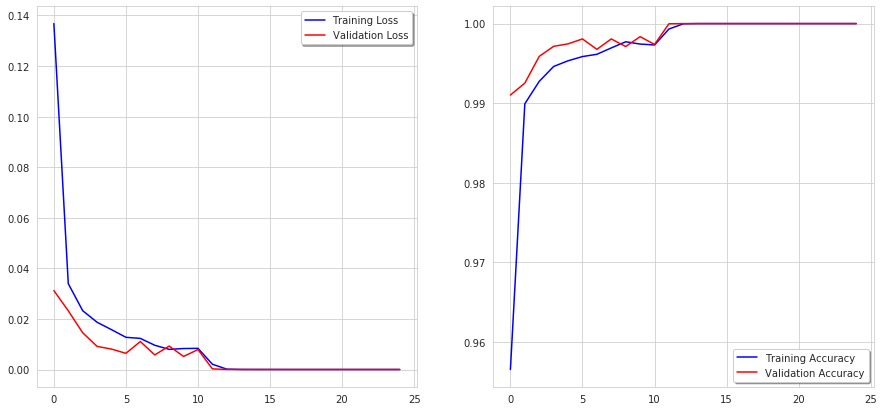

In [18]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color='b', label='Training Loss') 
ax1.plot(history.history['val_loss'], color='r', label = 'Validation Loss',axes=ax1)
legend = ax1.legend(loc='best', shadow=True)
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['acc'], color='b', label='Training Accuracy') 
ax2.plot(history.history['val_acc'], color='r', label = 'Validation Accuracy')
legend = ax2.legend(loc='best', shadow=True)

### Confusion Matrix

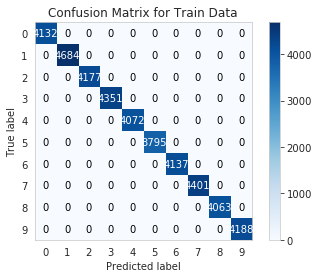

In [19]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_true,y_pred_classes,title='Confusion Matrix for Train Data')

### Predicting results on test data

In [20]:
results = model.predict(test)
results = np.argmax(results, axis=1)
results = pd.Series(results, name='Label')

In [21]:
submission = pd.concat([pd.Series(range(1,28001), name='ImageId'), results], axis=1)
submission.to_csv(r'Digit_Recognizer_MNIST', index=False)